Build an audio tagging system that can categorize an audio clip as belonging to one of a set of 41 diverse categories drawn from the AudioSet Ontology.  

Link 2018:  https://www.kaggle.com/c/freesound-audio-tagging/  
Link 2019: https://www.kaggle.com/c/freesound-audio-tagging-2019/overview  




In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# mount dataset folder
import sys
IN_COLAB = "google.colab" in sys.modules
if IN_COLAB:
    base_path = '/content/drive/My Drive/Colab Notebooks/ML_sound_classification_project'
else:
    base_path = ""

# set train-tests paths
import os
train_path = os.path.join(base_path, 'FSDKaggle2018.audio_train')
train_labels_path = os.path.join(base_path, 'FSDKaggle2018.meta', 'train.csv')
test_path = os.path.join(base_path, 'FSDKaggle2018.audio_test')
test_labels_path = os.path.join(base_path, 'FSDKaggle2018.meta', 'test.csv')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd

In [3]:
train_df = pd.read_csv(train_labels_path)
test_df = pd.read_csv(test_labels_path)

print("Number of training examples: %d"%(train_df.shape[0]))
print("Number of tesing examples: %d"%(test_df.shape[0]))
print("Number of Classes: %d"%(train_df.label.nunique()))
print("Classes: ",train_df.label.unique())

Number of training examples: 9473
Number of tesing examples: 1600
Number of Classes: 41
Classes:  ['Hi-hat' 'Saxophone' 'Trumpet' 'Glockenspiel' 'Cello' 'Knock'
 'Gunshot_or_gunfire' 'Clarinet' 'Computer_keyboard' 'Keys_jangling'
 'Snare_drum' 'Writing' 'Laughter' 'Tearing' 'Fart' 'Oboe' 'Flute' 'Cough'
 'Telephone' 'Bark' 'Chime' 'Bass_drum' 'Bus' 'Squeak' 'Scissors'
 'Harmonica' 'Gong' 'Microwave_oven' 'Burping_or_eructation' 'Double_bass'
 'Shatter' 'Fireworks' 'Tambourine' 'Cowbell' 'Electric_piano' 'Meow'
 'Drawer_open_or_close' 'Applause' 'Acoustic_guitar' 'Violin_or_fiddle'
 'Finger_snapping']


In [4]:
train_df.head()

,fname,label,manually_verified,freesound_id,license
0,00044347.wav,Hi-hat,0,28739,Attribution
1,001ca53d.wav,Saxophone,1,358827,Attribution
2,002d256b.wav,Trumpet,0,10897,Creative Commons 0
3,0033e230.wav,Glockenspiel,1,325017,Attribution
4,00353774.wav,Cello,1,195688,Attribution


https://www.kaggle.com/fizzbuzz/beginner-s-guide-to-audio-data

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Minimum samples per category =  94
Maximum samples per category =  300


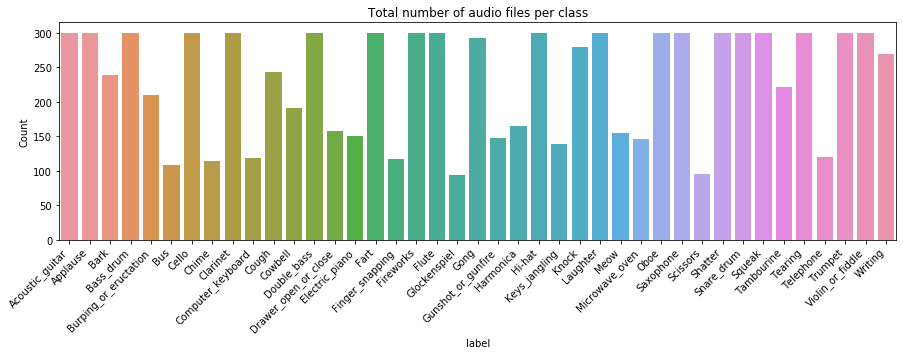

In [6]:
plt.figure(figsize=(15,4))
labels_grouped = train_df.groupby(by=['label'], ).count()
chart = sns.barplot(x=labels_grouped.index, y=labels_grouped["fname"])
chart.set_xticklabels(labels=chart.get_xticklabels(), rotation=45, horizontalalignment='right');
chart.set_title("Total number of audio files per class");
chart.set_ylabel('Count');
print('Minimum samples per category = ', min(train_df['label'].value_counts()))
print('Maximum samples per category = ', max(train_df['label'].value_counts()))

0    5763
1    3710
Name: manually_verified, dtype: int64

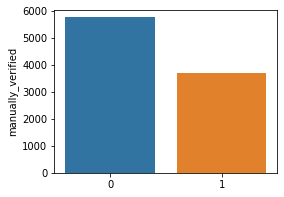

In [7]:
plt.figure(figsize=(4,3))
sns.barplot(y=train_df["manually_verified"].value_counts(), x=train_df["manually_verified"].value_counts().index);
train_df["manually_verified"].value_counts()
# almost equal number of manually verified and non-verfied sounds

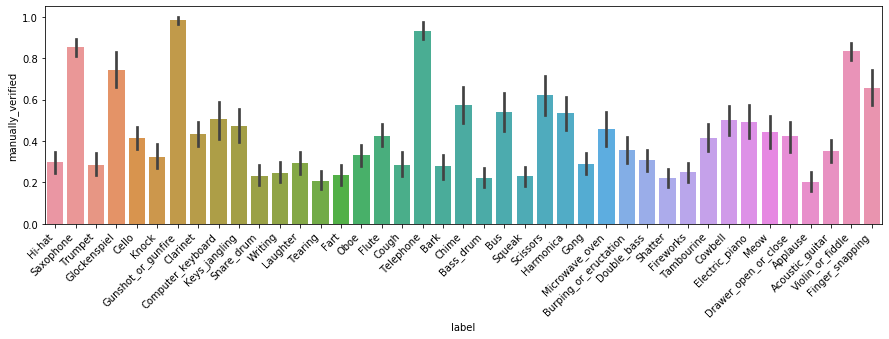

In [8]:
plt.figure(figsize=(15,4))
chart = sns.barplot(x=train_df["label"], y=train_df['manually_verified'])
chart.set_xticklabels(labels=chart.get_xticklabels(), rotation=45, horizontalalignment='right');
# Few classes are manually verfied in high number

In [10]:
import IPython.display as ipd  # To play sound in the notebook
import wave

fname = os.path.join(train_path, '0c7ae294.wav')   # Applause
# Using wave library
wav = wave.open(fname)
print("Sampling (frame) rate = ", wav.getframerate())
print("Total samples (frames) = ", wav.getnframes())
print("Duration = ", wav.getnframes()/wav.getframerate())

ipd.Audio(fname)

Sampling (frame) rate =  44100
Total samples (frames) =  299880
Duration =  6.8


In [11]:
filtered_classes = ['Saxophone','Applause','Acoustic_guitar','Bark','Bass_drum','Cough','Fireworks','Laughter','Flute','Trumpet']
train_df_filtered = train_df[train_df["label"].isin(filtered_classes)]
test_df_filtered = test_df[test_df["label"].isin(filtered_classes)]
train_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2882 entries, 1 to 9472
Data columns (total 5 columns):
fname                2882 non-null object
label                2882 non-null object
manually_verified    2882 non-null int64
freesound_id         2882 non-null int64
license              2882 non-null object
dtypes: int64(2), object(3)
memory usage: 135.1+ KB


#### Viz

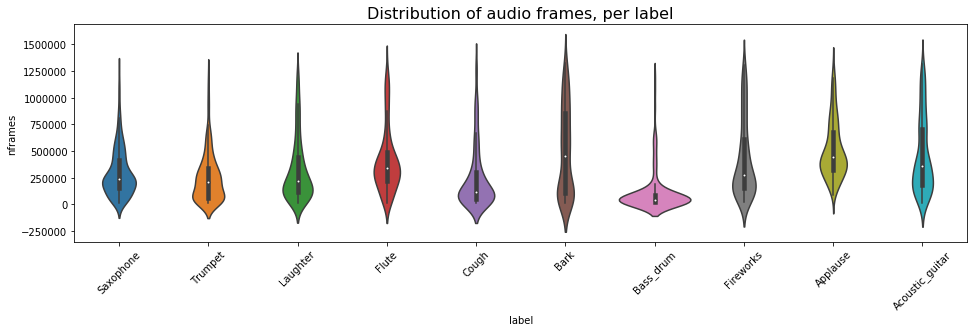

In [27]:
# train_base_path = os.path.join(base_path, 'FSDKaggle2018.audio_train')
# test_base_path = os.path.join(base_path, 'FSDKaggle2018.audio_test')

# train_df_filtered['nframes'] = train_df_filtered['fname'].apply(lambda f: wave.open(os.path.join(train_base_path, f)).getnframes())
# test_df_filtered['nframes'] = test_df_filtered['fname'].apply(lambda f: wave.open(os.path.join(test_base_path, f)).getnframes())

# _, ax = plt.subplots(figsize=(16, 4))
# sns.violinplot(ax=ax, x="label", y="nframes", data=train_df_filtered)
# plt.xticks(rotation=45)
# plt.title('Distribution of audio frames, per label', fontsize=16)
# plt.show()

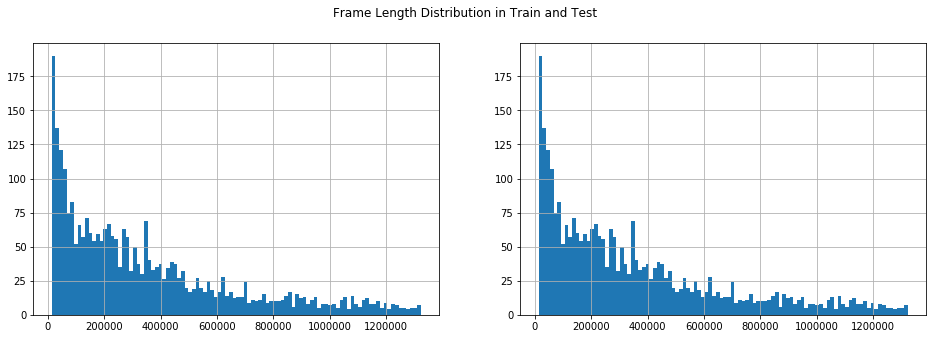

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
train_df_filtered.nframes.hist(bins=100, ax=axes[0])
train_df_filtered.nframes.hist(bins=100, ax=axes[1])
plt.suptitle('Frame Length Distribution in Train and Test', ha='center', fontsize='large');

####  Building a Model using Raw Wave

In [0]:
import librosa
import numpy as np
import scipy

In [16]:
train_df_filtered['fname']

1       001ca53d.wav
2       002d256b.wav
15      0097160c.wav
16      00ad7068.wav
19      00c934d7.wav
            ...     
9456    ffbba18f.wav
9457    ffc8d3ae.wav
9468    ffec59fb.wav
9470    fff44ac6.wav
9472    fff81f55.wav
Name: fname, Length: 2882, dtype: object

In [0]:
train_base_path = os.path.join(base_path, 'FSDKaggle2018.audio_train')
test_base_path = os.path.join(base_path, 'FSDKaggle2018.audio_test')

file_path = os.path.join(train_base_path, train_df_filtered['fname'].iloc[0])
data, _ = librosa.core.load(file_path, sr=16000, res_type='kaiser_fast')

In [0]:
audio_duration = 2
sampling_rate = 16000
audio_length = audio_duration * sampling_rate

In [46]:
len(data), audio_length

(165120, 320000)

In [0]:
def pad_dataset(data, audio_length):
    '''
    Pad dataset if less than audio_length
    '''
    # Random offset / Padding
    if len(data) > audio_length:
        max_offset = len(data) - audio_length
        offset = np.random.randint(max_offset)
        data = data[offset:(audio_length+offset)]
    # pad if data is smaller
    else:
        if audio_length > len(data):
            max_offset = audio_length - len(data)
            offset = np.random.randint(max_offset)
        else:
            offset = 0
        data = np.pad(data, (offset, audio_length - len(data) - offset), "constant")

def normalize_audio(data):
    '''
    Scale data in range [0, 1]
    Input: data
    '''    
    min_data = np.min(data)
    max_data = np.max(data)
    data = (data-min_data)/(max_data - min_data+1e-6)
    return data - 0.5

In [0]:
from keras.models import Sequential
from keras.layers import Conv1D

In [58]:
model = Sequential()
model.add()

model.compile()